In [1]:
import numpy as np
import mne
from tqdm import tqdm 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn import preprocessing


import random
from openTSNE import TSNE

plt.style.use('default')

random.seed(123)

In [3]:
ictal = np.load('ictal_feature.npy')
interictal = np.load('interictal_feature.npy')

In [4]:
np.shape(interictal)

(182, 18, 36)

In [18]:
ictal = np.reshape(ictal, [np.shape(ictal)[0]*np.shape(ictal)[1],np.shape(interictal)[2]])
interictal = np.reshape(interictal, [np.shape(interictal)[0]*np.shape(interictal)[1],np.shape(interictal)[2]])
np.shape(ictal), np.shape(interictal)

((594, 36), (594, 36))

In [ ]:
pca_interictal = []
pca_ictal = []
x1 = []
x2 = []
x3 = []
x4 = []

pca = PCA(n_components=2)

pca_interictal = (pca.fit_transform(preprocessing.normalize(interictal)))
pca_ictal = (pca.fit_transform(preprocessing.normalize(ictal)))

x1.append(pca_interictal[:,0])
x2.append(pca_interictal[:,1])
x3.append(pca_ictal[:,0])
x4.append(pca_ictal[:,1])

plt.figure()
for i in range(len(x1)):
    plt.plot(x1[i], x2[i], '.',label = 'Inter-Ictal' if i == 0 else "", color="green")
    plt.plot(x3[i], x4[i], '.', label = 'Ictal' if i == 0 else "", color = "red")


plt.legend()
plt.show()

# no reshape

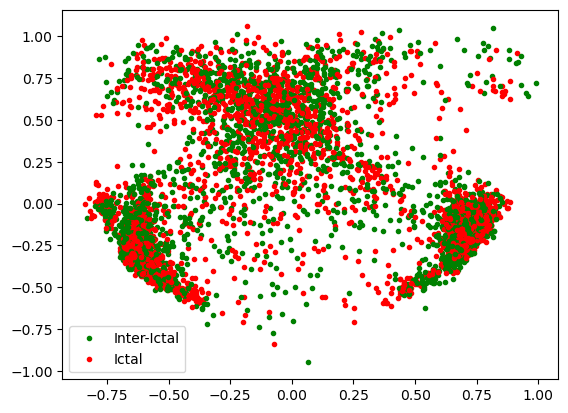

In [2]:
ictal = np.load('ictal_feature.npy')
interictal = np.load('interictal_feature.npy')

pca_interictal = []
pca_ictal = []
x1 = []
x2 = []
x3 = []
x4 = []

pca = PCA(n_components=2)

for i in range(np.shape(ictal)[0]):
    a = pca.fit_transform(preprocessing.normalize(ictal[i]))
    pca_ictal.append(a)
    x3.append(a[:,0])
    x4.append(a[:,1])
    
for j in range(np.shape(interictal)[0]):
    b = pca.fit_transform(preprocessing.normalize(interictal[j]))
    pca_interictal.append(b)
    x1.append(b[:,0])
    x2.append(b[:,1])



plt.figure()
for i in range(len(x1)):
    #plt.plot(x1[i], x2[i], '.',label = 'Inter-Ictal')
    #plt.plot(x3[i], x4[i], '.', label = 'Ictal')
    plt.plot(x1[i], x2[i], '.',label = 'Inter-Ictal' if i == 0 else "", color="green")
    plt.plot(x3[i], x4[i], '.', label = 'Ictal' if i == 0 else "", color = "red")
    plt.legend()


plt.show()


In [3]:
df = pd.read_excel('output.xlsx', index_col=0)
patientlist = []
colorslist = []

patient = ['chb01', 'chb02','chb03','chb04','chb05','chb06','chb07','chb08','chb09',
         'chb10', 'chb11','chb12','chb13','chb14','chb15','chb16','chb17','chb18',
         'chb19','chb20', 'chb21', 'chb22','chb23']

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'deeppink', 'powderblue','darkorange','gray','aquamarine','lawngreen', 'peru', 'cornflowerblue', 'lightpink', 'darkblue', 'palegreen', 'peachpuff', 
          'burlywood', 'rosybrown', 'darkgray', 'g']


for i in range(len(patient)):
    for j in range(sum(df['patient']==patient[i])*18):
        colorslist.append(colors[i])
        patientlist.append(patient[i])

In [5]:
np.shape(interictal), np.shape(ictal)

((182, 18, 36), (182, 18, 36))

In [6]:
ictal_reshape = np.reshape(ictal, [np.shape(ictal)[0]*np.shape(ictal)[1],np.shape(interictal)[2]])
interictal_reshape = np.reshape(interictal, [np.shape(interictal)[0]*np.shape(interictal)[1],np.shape(interictal)[2]])

tsne_comps1 = TSNE(n_components=2, perplexity=30, verbose=True, n_jobs=8,random_state=123).fit(ictal_reshape)
tsne_comps2 = TSNE(n_components=2, perplexity=30, verbose=True, n_jobs=8,random_state=123).fit(interictal_reshape)


--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=123, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.45 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.16 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=273.00 for 250 iterations...
Iteration   50, KL divergence 3.9517, 50 iterations in 0.9584 sec
Iteration  100, KL divergence 3.4905, 50 iterations in 0.8392 sec
Iteration  150, KL divergence 3.4700, 50 iterations in 0.8150 sec
Iteration  200, KL divergence 3.4618, 50 iterations in 0.7426 sec
Iteration  250, KL divergence 3.4579, 50 iterations in 0.7284 sec
   --> Time elapsed: 4.08 seconds
===> Running optimization with exaggeration=1.00, lr=273.00 for 500 

In [28]:
fig, ax = plt.subplots(figsize=(10, 7))
for i in range(182*18):
    ax.scatter(tsne_comps1[i][0], tsne_comps1[i][1],
               c = "blue", label = "Ictal" if i == 0 else "")
    ax.scatter(tsne_comps2[i][0], tsne_comps2[i][1],
               c = "red", label = "Interictal" if i == 0 else "")
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=15) 
plt.show()

In [18]:
overall_vecs = np.concatenate((ictal_reshape, interictal_reshape))
tsne_comps = TSNE(n_components=2, perplexity=30, verbose=True, n_jobs=8,random_state=123).fit(overall_vecs)

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=123, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.83 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.27 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=546.00 for 250 iterations...
Iteration   50, KL divergence 4.4936, 50 iterations in 2.0432 sec
Iteration  100, KL divergence 3.9213, 50 iterations in 1.6973 sec
Iteration  150, KL divergence 3.8819, 50 iterations in 1.6577 sec
Iteration  200, KL divergence 3.8713, 50 iterations in 1.6406 sec
Iteration  250, KL divergence 3.8662, 50 iterations in 1.7014 sec
   --> Time elapsed: 8.74 seconds
===> Running optimization with exaggeration=1.00, lr=546.00 for 500 

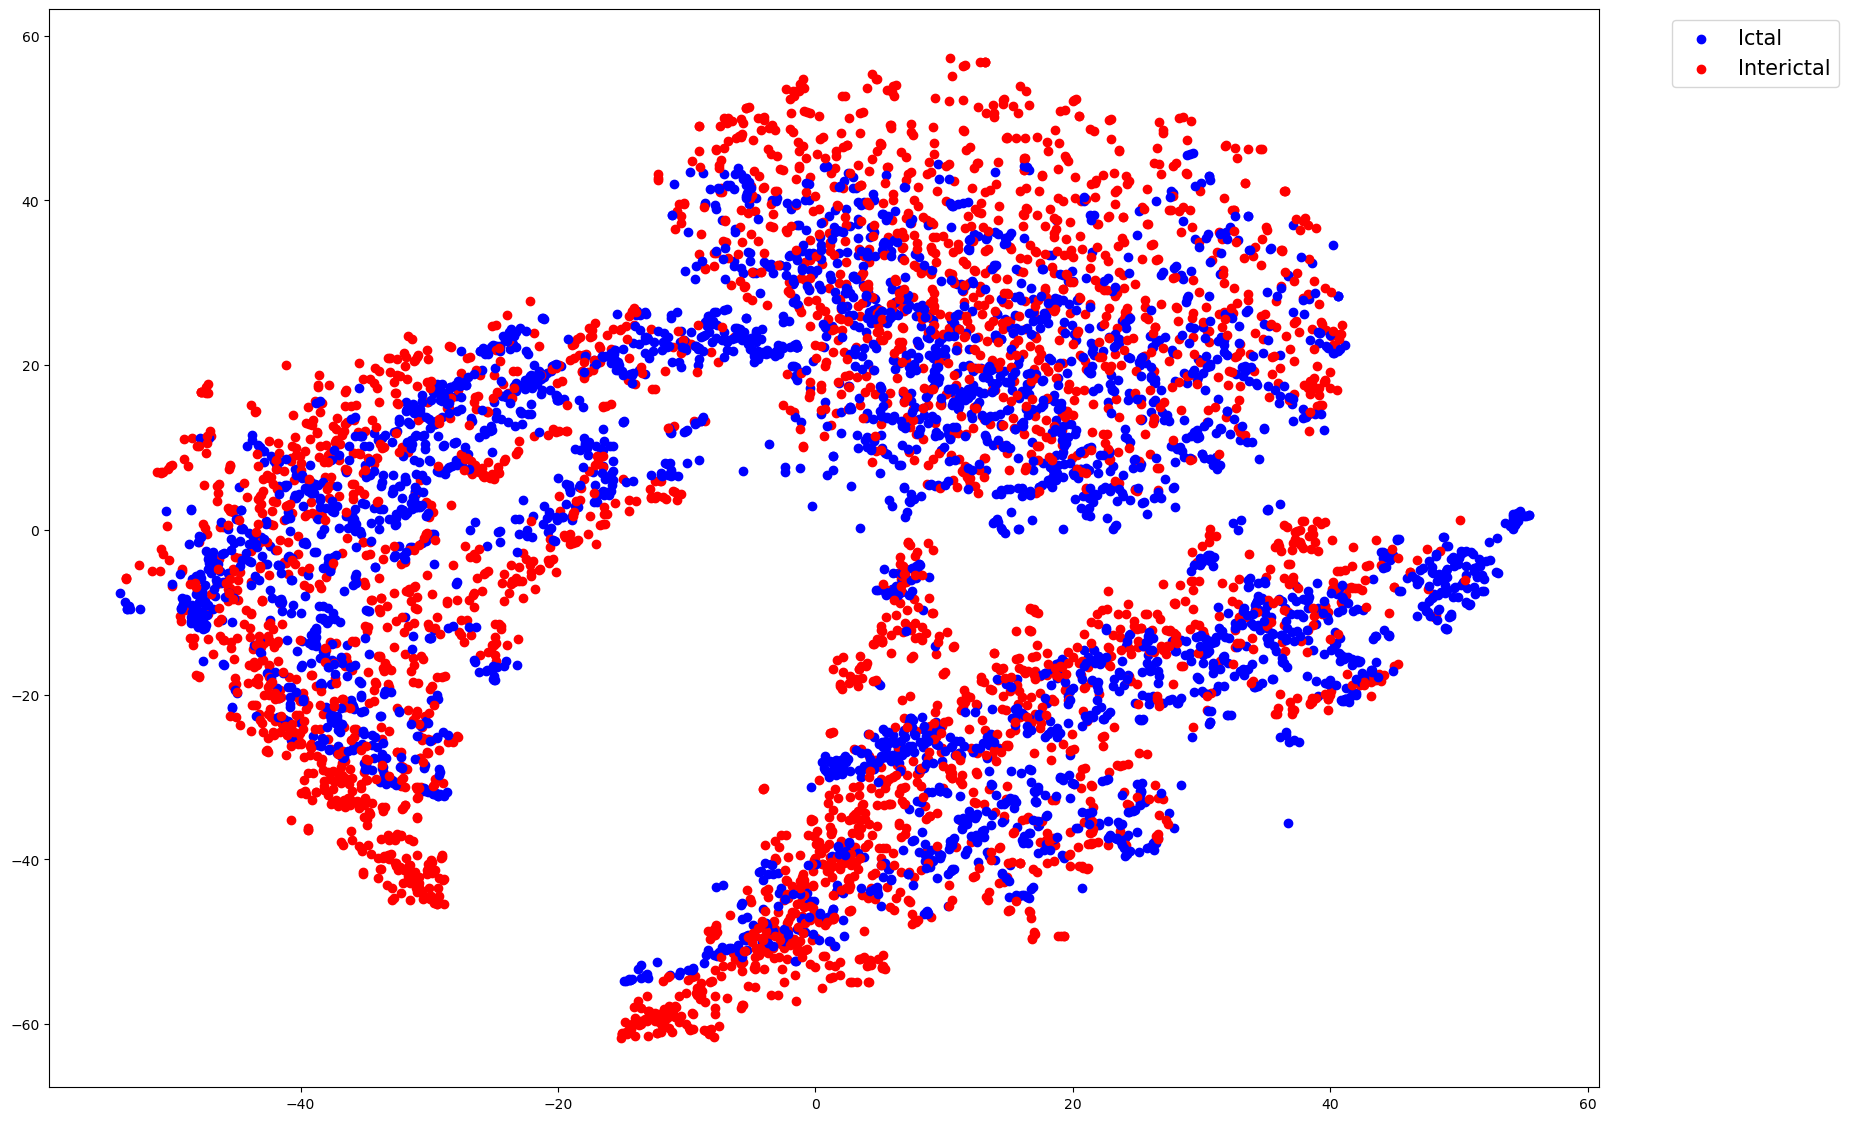

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))

for i in range(3276):
    ax.scatter(tsne_comps[i][0], tsne_comps1[i][1],
               c = "blue", label = "Ictal" if i == 0 else "")
    ax.scatter(tsne_comps[i+3276][0], tsne_comps[i+3276][1],
               c = "red", label = "Interictal" if i == 0 else "")
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=15) 
plt.show()

In [25]:
tsne_comps3 = tsne_comps[3276:]
np.shape(tsne_comps3)

(3276, 2)